# Visualização dos Dados

Para visualização vamos usar a biblioteca Seaborn. 

In [1]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
data1 = pd.read_csv("../output/eleicoes_genero_total.csv")
data1

,ano,genero,total_por_genero,total,porcentagem
0,2000,feminino,853,4372.0,0.195105
1,2000,masculino,3519,4372.0,0.804895
2,2004,feminino,943,4050.0,0.232840
3,2004,masculino,3107,4050.0,0.767160
4,2008,feminino,816,3700.0,0.220541
5,2008,masculino,2884,3700.0,0.779459
6,2012,feminino,1582,5000.0,0.316400
7,2012,masculino,3418,5000.0,0.683600
8,2016,feminino,1680,5106.0,0.329025
9,2016,masculino,3426,5106.0,0.670975


In [16]:
data1['ano'] = data1['ano'].astype('str')
data1.dtypes

ano                  object
genero               object
total_por_genero      int64
total               float64
porcentagem         float64
dtype: object

In [36]:
data_selected

,ano,genero,total_por_genero,total,porcentagem
0,2000,feminino,853,4372.0,0.195105
2,2004,feminino,943,4050.0,0.232840
4,2008,feminino,816,3700.0,0.220541
6,2012,feminino,1582,5000.0,0.316400
8,2016,feminino,1680,5106.0,0.329025
10,2020,feminino,2087,6076.0,0.343483


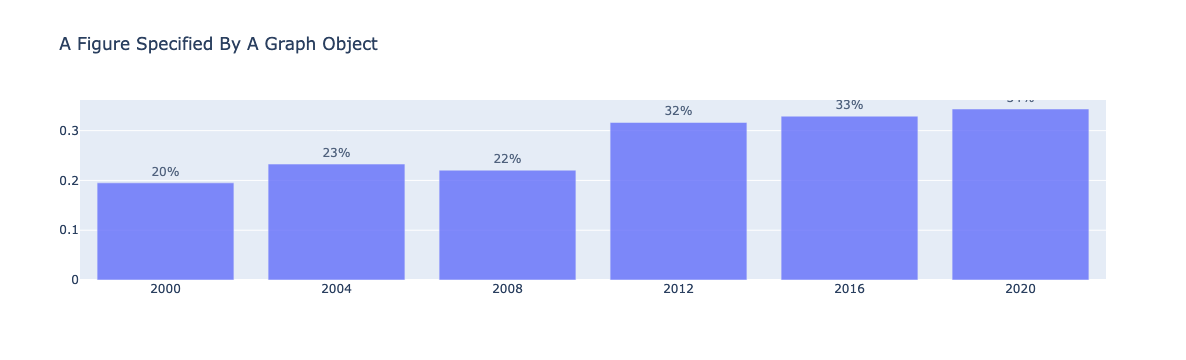

In [64]:
data_selected = data1.query("genero == 'feminino'")


fig = go.Figure(
    data=[
        go.Bar(
            x=data_selected.ano, 
            y=data_selected.porcentagem, 
            text=data_selected.porcentagem,
            texttemplate='%{y:.0%}',
            hovertemplate='Ano: %{x} <br /> %: %{y:.0%}',
            opacity=0.8
        )
    ],


)

fig.update_layout(
    title="A Figure Specified By A Graph Object",
)

fig.update_traces(textposition='outside')
fig.show()

In [24]:
fig = px.bar(
    data1.query("genero == 'feminino'"),
    x='ano',
    y='porcentagem',
    width=800,
    text='porcentagem',
    labels={'ano': '', 'porcentagem': '% de candidatos'},
    texttemplate = "%{ano}: %{porcentagem:$,s} <br>"
)

fig.update_xaxes(  
  showgrid=False,
  linecolor="#C0C0C0",
  linewidth=1
)

fig.update_yaxes( 
  showgrid=False,
  linecolor="#C0C0C0",
  linewidth=1,
)

fig.update_layout(
)

fig.show()

TypeError: bar() got an unexpected keyword argument 'texttemplate'

In [ ]:
field = 'DS_COR_RACA'
field_name = 'Cor/Raça'

my_plot_data = data_eleicoes_graph.query("NM_MUNICIPIO == '" + municipio_choose.value + "'").sort_values(by='TOTAL', ascending=False)
my_plot_data['PERCENT'] = my_plot_data['TOTAL'] / my_plot_data['TOTAL'].sum()
max_percent = my_plot_data.iloc[my_plot_data['TOTAL'].argmax()]

title = 'Distribuição dos vereadores por ' + field_name

highlight_bar = '#1B5583'
bars_color = ['#C0C0C0']*len(my_plot_data)
bars_color[0] = highlight_bar

fig = px.bar(
    my_plot_data, 
    x=field, 
    y='TOTAL', 
    title=title,
    labels={field: '', 'TOTAL': 'Total de Candidatos'},
    opacity=0.7,
    text="TOTAL",
    width=900,
    )

fig.update_yaxes( 
  showgrid=False,
  linecolor="#C0C0C0",
  linewidth=1
)

fig.update_xaxes(  
  showgrid=False,
  linecolor="#C0C0C0",
  linewidth=1
)

fig.update_traces(marker_color=bars_color, marker_line_color='#000000',
                  marker_line_width=1, opacity=0.7)


fig.update_layout(
    plot_bgcolor="#FFFFFF",
    title_font_color="#000000",
    title_font_size=25
)

fig.show()